In [10]:
from glob import glob
import seaborn as sns
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm

In [11]:
if sys.platform == 'darwin':
    kws_globstr = "/Users/markjos/projects/malachor5/data/kws/*.json"
else:
    kws_globstr = r"C:\projects\malachor5\data\keyword_search\tira_eval_kws\*.json"
kws_files = glob(kws_globstr)
kws_files[:5], len(kws_files)

(['C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20210312-0_1sec.json',
  'C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20210312-0_25sec-avg_speech_prob-hmm.json',
  'C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20210312-0_25sec-avg_speech_prob.json',
  'C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20210312-0_25sec-avg_speech_prob_weighted-hmm.json',
  'C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20210312-0_25sec-avg_speech_prob_weighted.json'],
 41)

In [12]:
rows = []
for kws_path in tqdm(kws_files):
    kws_basename = os.path.basename(kws_path)
    kws_basename = os.path.splitext(kws_basename)[0]
    kws_chunks = kws_basename.split('-')
    kws_stem = kws_chunks[0]
    windowlen_chunk = [chunk for chunk in kws_chunks if chunk.endswith('sec')][0]
    window_len = float(windowlen_chunk.removesuffix('sec').replace('_', '.'))
    oov_type = 'inverse_keyword_prob'
    if 'avg_speech_prob_weighted' in kws_basename:
        oov_type = 'avg_speech_prob_weighted'
    elif 'avg_speech_prob' in kws_basename:
        oov_type = 'avg_speech_prob'
    with open(kws_path, encoding='utf8') as f:
        kws_obj=json.load(f)
    metrics = kws_obj['metrics']
    for metric in metrics:
        rows.append({
            "source": kws_stem,
            "window_len": window_len,
            "eer": metric['eer'],
            "eer_threshold": metric['eer_threshold'],
            "eer_windowed": metric.get('eer_windowed', None),
            "eer_threshold_windowed": metric.get('eer_threshold_windowed', None),
            "lr_eer": metric['lr_eer'],
            "lr_eer_threshold": metric['lr_eer_threshold'],
            "lr_beta1": metric["lr_params"]["lr_coefficients"][0][0],
            "lr_beta2": metric["lr_params"]["lr_coefficients"][0][1],
            "lr_intercept": metric["lr_params"]["lr_intercept"],
            "keyword": metric["keyword"],
            "oov_type": oov_type,
            "hmm": 'hmm' in kws_basename,
        })
df = pd.DataFrame(rows)
df['keyword_len']=df['keyword'].str.len()
df.head()

100%|██████████| 41/41 [00:22<00:00,  1.81it/s]


,source,window_len,eer,eer_threshold,eer_windowed,eer_threshold_windowed,lr_eer,lr_eer_threshold,lr_beta1,lr_beta2,lr_intercept,keyword,oov_type,hmm,keyword_len
0,HH20210312,0.1,0.500000,0.258044,0.607143,0.288296,0.500000,0.000128,-1.429021,-3.354089,-6.612809,və́lɛ̀ðǎjó,inverse_keyword_prob,False,12
1,HH20210312,0.1,0.394739,0.196531,0.622490,0.224653,0.428571,0.000308,-0.994439,-3.191111,-6.023175,və́lɛ̂ðɔ́ló,inverse_keyword_prob,False,12
2,HH20210312,0.1,0.151483,0.194900,0.539683,0.213948,0.498246,0.000128,-0.904309,-3.431255,-6.784901,jɛ,inverse_keyword_prob,False,2
3,HH20210312,0.1,0.431144,0.374101,0.513514,0.407210,0.396443,0.002238,-1.406519,-2.457539,-4.140542,və́lɛ̀ðɔ́,inverse_keyword_prob,False,9
4,HH20210312,0.1,0.570702,0.188720,0.583333,0.226150,0.476190,0.000838,-0.962935,-2.906473,-5.182657,və́lɛ̀ðǎló,inverse_keyword_prob,False,12


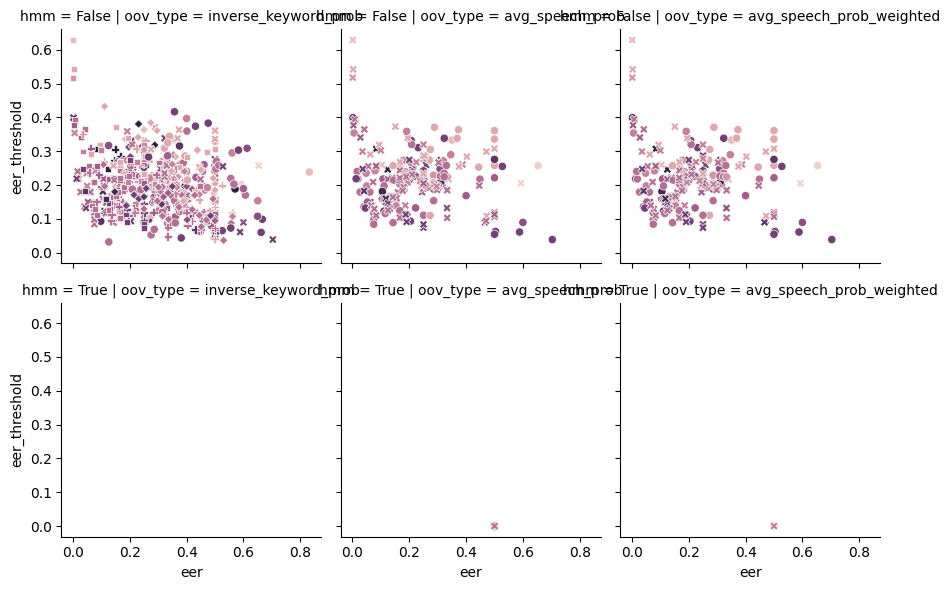

In [13]:
fig=sns.FacetGrid(df, col='oov_type', row='hmm')
fig.map_dataframe(sns.scatterplot, x='eer', y='eer_threshold', hue='keyword_len', style="window_len")
# fig.set(ylim=(0,1), xlim=(0,1))
# for _, row in df.iterrows():
    # plt.text(row['eer'], row['eer_threshold'], row['keyword'])
plt.show()

In [18]:
df[df['hmm']]

,source,window_len,eer,eer_threshold,eer_windowed,eer_threshold_windowed,lr_eer,lr_eer_threshold,lr_beta1,lr_beta2,lr_intercept,keyword,oov_type,hmm,keyword_len
22,HH20210312,0.25,0.500056,0.000011,0.501006,0.003818,0.499944,inf,-0.000003,-0.000159,-7.236456,və́lɛ̂ðɔ́ló,avg_speech_prob,True,12
23,HH20210312,0.25,0.500057,0.000033,0.501266,0.004419,0.499943,inf,-0.000004,-0.000170,-4.695493,ùnɛ́ɾɛ́,avg_speech_prob,True,8
24,HH20210312,0.25,0.500056,0.000013,0.501109,0.005783,0.499944,inf,-0.000006,-0.000158,-5.516447,və́lɛ̂ðà,avg_speech_prob,True,9
25,HH20210312,0.25,0.500056,0.000008,0.500994,0.004522,0.499944,inf,-0.000003,-0.000112,-8.761256,və́lɛ̀ðǎjó,avg_speech_prob,True,12
26,HH20210312,0.25,0.500045,0.000088,0.500994,0.003817,0.499944,inf,-0.000002,-0.000112,-8.761256,jɛ,avg_speech_prob,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,HH20210913,0.50,0.500083,0.000004,0.500699,0.005213,0.499917,inf,-0.000007,-0.000225,-6.405774,ɛ̀ɾɛ̀ð,avg_speech_prob_weighted,True,6
541,HH20210913,0.50,0.500083,0.000026,0.500715,0.005500,0.499917,inf,-0.000007,-0.000226,-5.403351,ðî,avg_speech_prob_weighted,True,3
542,HH20210913,0.50,0.500083,0.000023,0.500717,0.006718,0.499917,inf,-0.000010,-0.000237,-6.029724,ðɛ̀,avg_speech_prob_weighted,True,3
543,HH20210913,0.50,0.500083,0.000033,0.500719,0.007180,0.499917,inf,-0.000011,-0.000247,-5.651227,ðé,avg_speech_prob_weighted,True,3


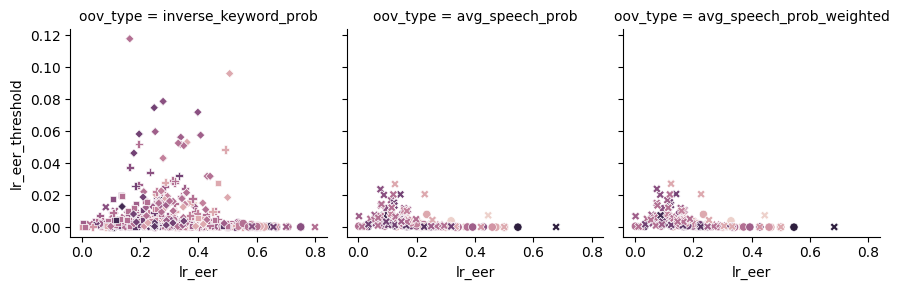

In [14]:
fig=sns.FacetGrid(df, col='oov_type')
fig.map_dataframe(sns.scatterplot, x='lr_eer', y='lr_eer_threshold', hue='keyword_len', style="window_len")
# fig.set(ylim=(0,1), xlim=(0,1))
# for _, row in df.iterrows():
    # plt.text(row['eer'], row['eer_threshold'], row['keyword'])
plt.show()

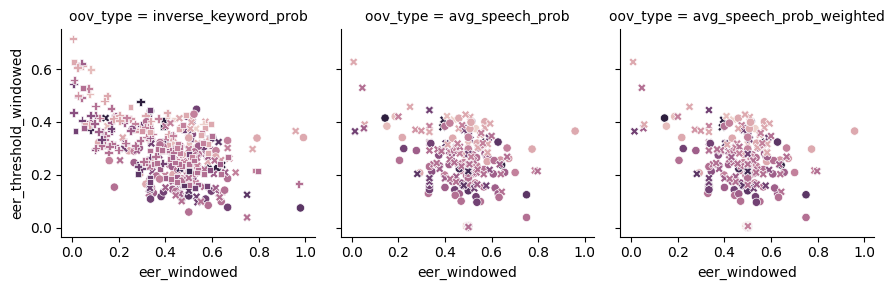

In [15]:
fig=sns.FacetGrid(df, col='oov_type')
fig.map_dataframe(sns.scatterplot, x='eer_windowed', y='eer_threshold_windowed', hue='keyword_len', style="window_len")
# fig.set(ylim=(0,1), xlim=(0,1))
# for _, row in df.iterrows():
    # plt.text(row['eer'], row['eer_threshold'], row['keyword'])
plt.show()

In [16]:
df.pivot_table(index=['oov_type', 'window_len'], values=['eer', 'lr_eer', 'eer_threshold', 'lr_eer_threshold'], aggfunc='std')

eer  eer_threshold    lr_eer  \
oov_type                 window_len                                      
avg_speech_prob          0.25        0.177314       0.120285  0.158897   
                         0.50        0.176060       0.130223  0.178334   
avg_speech_prob_weighted 0.25        0.177314       0.120285  0.158884   
                         0.50        0.176060       0.130223  0.178396   
inverse_keyword_prob     0.10        0.141040       0.088793  0.117227   
                         0.25        0.157247       0.080793  0.176543   
                         0.50        0.133653       0.095620  0.126686   
                         1.00        0.127940       0.067407  0.119603   
                         2.00        0.104380       0.076469  0.092336   

                                     lr_eer_threshold  
oov_type                 window_len                    
avg_speech_prob          0.25                     NaN  
                         0.50                     NaN  
avg_speech_prob_weighted 0.25                     NaN  
                         0.50                     NaN  
inverse_keyword_prob     0.10                0.001062  
                         0.25                0.003165  
                         0.50                0.005602  
                         1.00                0.010944  
                         2.00                0.023019

In [17]:
df=df.sort_values()
for window_len in df['window_len'].unique():
    window_len_mask = df['window_len']==window_len
    print(
        window_len +'\n',
        df.loc[window_len_mask,['keyword_len', 'eer', 'eer_threshold']].corr('spearman')
    )

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [ ]:
df.loc[df['window_len']==2,['keyword_len', 'eer', 'eer_threshold']].corr('spearman')

,keyword_len,eer,eer_threshold
keyword_len,1.000000,-0.286889,-0.323603
eer,-0.286889,1.000000,-0.426299
eer_threshold,-0.323603,-0.426299,1.000000
